#### Machine Learning: Regression (Module 2, week 4) - Ridge Regression
Keywords: Ridge regression, L2 Penalty, polynomial regression, bias-variance tradeoff, overfitting. 

In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [6]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [7]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = feature.pow(power)
    return poly_dataframe

In [88]:
def fit(features, target, alpha):
    regr = linear_model.Ridge(alpha=alpha, normalize=True, fit_intercept=True)
    model = regr.fit(X=features.as_matrix(), y=target)
    intercept = model.intercept_
    coefficients = model.coef_
    print "Intercept: ", intercept
    print "Coefficients: ", coefficients
    return intercept, coefficients, model

In [24]:
def plot(features, output, model):
    plt.scatter(features['power_1'], output, color='blue', label='Output')
    plt.plot(features['power_1'], model.predict(features), 'r', label='Regression')
    plt.ylabel('Price')
    plt.xlabel('Sq.ft.')

In [57]:
def fit_plot(features, power, output, alpha):
    poly_data = polynomial_dataframe(features, power)
    intercept, coefficients, model = fit(poly_data, output, alpha)
    plot(poly_data, output, model)

In [12]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(by=['sqft_living','price'])

In [13]:
sales.head()

id             date     price  bedrooms  bathrooms  \
19452  3980300371  20140926T000000  142000.0       0.0       0.00   
15381  2856101479  20140701T000000  276000.0       1.0       0.75   
860    1723049033  20140620T000000  245000.0       1.0       0.75   
18379  1222029077  20141029T000000  265000.0       0.0       0.75   
4868   6896300380  20141002T000000  228000.0       0.0       1.00   

       sqft_living  sqft_lot floors  waterfront  view     ...      grade  \
19452        290.0     20875      1           0     0     ...          1   
15381        370.0      1801      1           0     0     ...          5   
860          380.0     15000      1           0     0     ...          5   
18379        384.0    213444      1           0     0     ...          4   
4868         390.0      5900      1           0     0     ...          4   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
19452         290              0      1963             0    98024  47.5308   
15381         370              0      1923             0    98117  47.6778   
860           380              0      1963             0    98168  47.4810   
18379         384              0      2003             0    98070  47.4177   
4868          390              0      1953             0    98118  47.5260   

          long  sqft_living15  sqft_lot15  
19452 -121.888         1620.0     22850.0  
15381 -122.389         1340.0      5000.0  
860   -122.323         1170.0     15000.0  
18379 -122.491         1920.0    224341.0  
4868  -122.261         2170.0      6000.0  

[5 rows x 21 columns]

Intercept:  220664.375054
Coefficients:  [  1.24873306e+02  -4.77376011e-02   3.01446238e-05  -2.44419942e-09
  -1.94153675e-13   8.54085686e-18   1.51142121e-21   8.27979094e-26
   6.52603100e-31  -3.27895017e-34  -3.87962315e-38  -2.72437650e-42
  -1.07790800e-46   3.78242694e-51   1.39790296e-54]


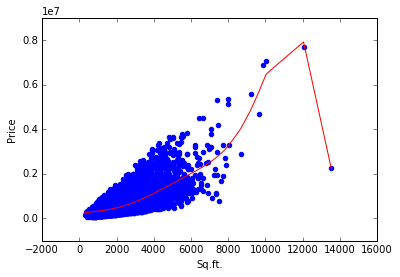

In [58]:
alpha = 1.5e-5
fit_plot(sales['sqft_living'], 15, sales['price'], alpha)

## 15th degree polynomial for 4 sets:

Intercept:  23888.8243547
Coefficients:  [  5.44669402e+02  -3.55447609e-01   1.22446383e-04  -1.17175319e-08
  -3.90512390e-13  -1.39076337e-17   1.47860303e-20   6.87491766e-25
  -7.57203973e-29  -1.04097309e-32  -3.71844070e-37   3.39989306e-41
   5.56592040e-45   2.53761332e-49  -3.35152892e-53]
Intercept:  -55614.6326304
Coefficients:  [  8.59362624e+02  -8.18118245e-01   4.28879962e-04  -9.12770589e-08
  -2.69604559e-12   3.73980323e-15  -1.42711896e-19  -6.30794739e-23
  -1.44559537e-27   7.44321296e-31   9.25865931e-35   3.27992730e-41
  -1.29543491e-42  -1.38781254e-46   1.66546439e-50]
Intercept:  470987.849889
Coefficients:  [ -7.55395885e+02   9.75579448e-01  -4.58945955e-04   7.77957984e-08
   7.15013457e-12  -2.88601959e-15  -2.13678421e-20   3.38085209e-23
   2.19178219e-27  -1.97067724e-31  -4.15993176e-35  -1.80196277e-39
   3.19071179e-43   5.08457003e-47  -3.93304307e-51]
Intercept:  -145655.611326
Coefficients:  [  1.11944568e+03  -9.83760160e-01   3.38770856e-04   

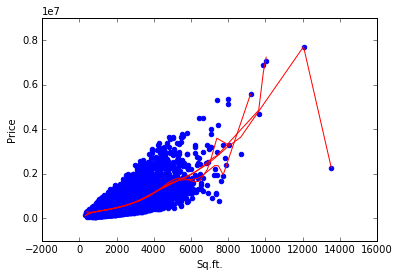

In [50]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

alpha = 1e-9
fit_plot(set_1['sqft_living'], 15, set_1['price'], alpha)
fit_plot(set_2['sqft_living'], 15, set_2['price'], alpha)
fit_plot(set_3['sqft_living'], 15, set_3['price'], alpha)
fit_plot(set_4['sqft_living'], 15, set_4['price'], alpha)

Intercept:  539103.031058
Coefficients:  [  2.32806803e+00   3.53621608e-04   3.31969692e-08   2.00082477e-12
   1.11492559e-16   6.57786122e-21   4.12939525e-25   2.70393755e-29
   1.81614763e-33   1.23824277e-37   8.51872481e-42   5.89455598e-46
   4.09542560e-50   2.85464889e-54   1.99547476e-58]
Intercept:  529853.025358
Coefficients:  [  2.09756903e+00   3.90817483e-04   6.67189944e-08   8.90002997e-12
   9.72639877e-16   9.69733682e-20   9.50564475e-24   9.44491031e-28
   9.57191338e-32   9.86945155e-36   1.03101115e-39   1.08729784e-43
   1.15453748e-47   1.23211305e-51   1.31986696e-55]
Intercept:  533640.114097
Coefficients:  [  2.28906258e+00   4.12472190e-04   6.08835345e-08   6.58572163e-12
   6.15278155e-16   5.64446634e-20   5.28834396e-24   5.07091402e-28
   4.94657273e-32   4.88043809e-36   4.85009106e-40   4.84161534e-44
   4.84635021e-48   4.85883628e-52   4.87558469e-56]
Intercept:  524562.969047
Coefficients:  [  2.08596194e+00   4.05035772e-04   7.46864647e-08   1.

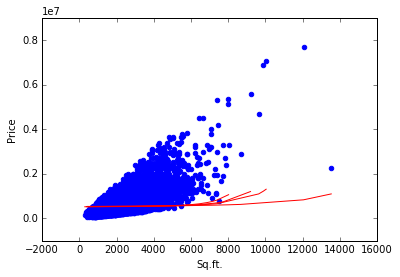

In [59]:
alpha = 1.23e2
fit_plot(set_1['sqft_living'], 15, set_1['price'], alpha)
fit_plot(set_2['sqft_living'], 15, set_2['price'], alpha)
fit_plot(set_3['sqft_living'], 15, set_3['price'], alpha)
fit_plot(set_4['sqft_living'], 15, set_4['price'], alpha)

## Cross validation
Perform cross validation from 1 to 15 degrees (15 polynomial powers) and pick the model with the lowest validation RSS.

In [60]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [70]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    n = len(data)
    average_validation_error = 0.0
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        validation_features = data[start:end+1]
        validation_output = output[start:end+1]
        training_features = data[0:start].append(data[end+1:n])
        training_output = output[0:start].append(output[end+1:n])
        intercept, coefficients, model = fit(training_features, training_output, alpha = l2_penalty)
        average_validation_error += np.sum((validation_output - model.predict(validation_features))**2)
    average_validation_error /= k
    return average_validation_error

### Minimize the error

In [83]:
power = 15
shuffled_output = train_valid_shuffled['price']
shuffled_features = polynomial_dataframe(train_valid_shuffled['sqft_living'], power)

k = 10
errors = []
penalties = np.logspace(3, 9, num=13)
for p in penalties:
    average_error = k_fold_cross_validation(k, p, shuffled_features, shuffled_output)
    errors.append(average_error)
    print "alpha = ",p," Error ", average_error
    
print "Minimum error is: ", min(errors)

alpha =  1000.0  Error  2.64977361037e+14
alpha =  3162.27766017  Error  2.65692935858e+14
alpha =  10000.0  Error  2.65924368957e+14
alpha =  31622.7766017  Error  2.65998081509e+14
alpha =  100000.0  Error  2.66021444554e+14
alpha =  316227.766017  Error  2.66028837919e+14
alpha =  1000000.0  Error  2.66031176438e+14
alpha =  3162277.66017  Error  2.66031915997e+14
alpha =  10000000.0  Error  2.66032149871e+14
alpha =  31622776.6017  Error  2.66032223829e+14
alpha =  100000000.0  Error  2.66032247216e+14
alpha =  316227766.017  Error  2.66032254612e+14
alpha =  1000000000.0  Error  2.66032256951e+14
Minimum error is:  2.64977361037e+14


### Retrain best model on full dataset

In [87]:
intercept, coefficients, model = fit(shuffled_features, shuffled_output, alpha = 1000.0)
test_output = test['price']
test_features = polynomial_dataframe(test['sqft_living'], power)
print "RSS on test data: ", np.sum((test_output - model.predict(test_features))**2)

RSS on test data:  2.83856861224e+14
